In [1]:
!pip install torcheval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.4/158.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 7.6 MB/s eta 0:00:00


In [2]:
# Importing Necessary Libraries

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import transforms, models
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split

from torcheval.metrics.functional import binary_f1_score

import torch.nn.functional as F

import os
from PIL import Image
import pandas as pd

In [3]:
# Setting Seed
torch.manual_seed(2023)
torch.cuda.manual_seed_all(2023)
torch.cuda.manual_seed(2023)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [4]:
# Setting device to GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
import sys
sys.path.append("/kaggle/input/net-and-helper-functions")
from net import Net
from train import trainer

In [6]:
# define data augmentation transformations
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

dataset = ImageFolder('/kaggle/input/splitted-ddd/output/train', transform=train_transforms)

In [7]:
train_size = np.int32(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_data, val_data = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=64, shuffle=True, num_workers=4)

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [8]:
model = Net().to(device)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

[Epoch 1, Batch 50] Loss: 0.695 Accuracy: 0.400
[Epoch 1, Batch 100] Loss: 0.683 Accuracy: 0.462
[Epoch 1, Batch 150] Loss: 0.675 Accuracy: 0.476
[Epoch 1, Batch 200] Loss: 0.676 Accuracy: 0.504
[Epoch 1, Batch 250] Loss: 0.678 Accuracy: 0.401
[Epoch 1, Batch 300] Loss: 0.662 Accuracy: 0.526
[Epoch 1, Batch 350] Loss: 0.651 Accuracy: 0.557
[Epoch 1, Batch 400] Loss: 0.656 Accuracy: 0.568
[Epoch 1, Batch 450] Loss: 0.657 Accuracy: 0.578
Epoch 1 Val Loss: 0.6792612020242013 		 Val Accuracy: 0.5672434568405151
Validation Loss Decreased(inf---->0.679261) 	 Saving the Model
[Epoch 2, Batch 50] Loss: 0.659 Accuracy: 0.464
[Epoch 2, Batch 100] Loss: 0.638 Accuracy: 0.544
[Epoch 2, Batch 150] Loss: 0.632 Accuracy: 0.546
[Epoch 2, Batch 200] Loss: 0.613 Accuracy: 0.630
[Epoch 2, Batch 250] Loss: 0.604 Accuracy: 0.623
[Epoch 2, Batch 300] Loss: 0.602 Accuracy: 0.639
[Epoch 2, Batch 350] Loss: 0.584 Accuracy: 0.643
[Epoch 2, Batch 400] Loss: 0.564 Accuracy: 0.653
[Epoch 2, Batch 450] Loss: 0.530 

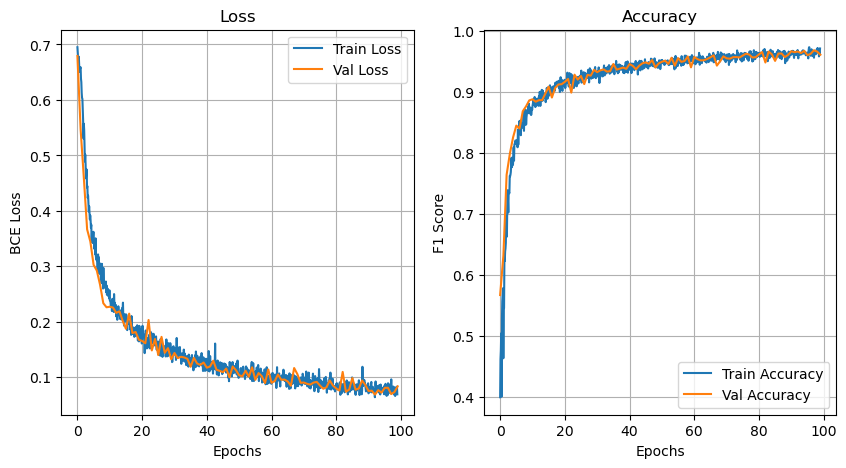

In [9]:
trainer(model, criterion, optimizer, train_loader, val_loader, num_epochs=100, device=device, min_batch_size=50)